# Library Project

## Import the Data from the [Seattle Open Data API](https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6)


In [219]:
import pandas as pd
import numpy as np
from sodapy import Socrata
import matplotlib.pyplot as plt 

%matplotlib inline

plt.style.use('fivethirtyeight')


In [3]:

client = Socrata('data.seattle.gov',
                  app_token='h5vKraDOpWIZy3vvPhZ6hBQab')

results = client.get('tmmm-ytt6', select="checkoutyear, checkoutmonth, checkouts, checkouttype", where='checkoutyear>=2005 AND checkoutmonth=3 AND usageclass="Digital"', limit = 20000000)

In [4]:
len(results)

694419

## Moving Library API Results into Pandas DataFrame

In [5]:
library_df = pd.DataFrame.from_records(results)

In [6]:
library_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694419 entries, 0 to 694418
Data columns (total 4 columns):
checkoutmonth    694419 non-null object
checkouts        694419 non-null object
checkouttype     694419 non-null object
checkoutyear     694419 non-null object
dtypes: object(4)
memory usage: 21.2+ MB


In [115]:
library_df = library_df.astype({'checkouts': 'int64','checkoutmonth': 'int64','checkoutyear': 'int64', 'checkouttype': 'str' }, inplace=True)

In [114]:
library_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694419 entries, 0 to 694418
Data columns (total 4 columns):
checkoutmonth    694419 non-null int64
checkouts        694419 non-null int64
checkouttype     694419 non-null object
checkoutyear     694419 non-null int64
dtypes: int64(3), object(1)
memory usage: 21.2+ MB


## Grouping by Month and Year:  
 

In [13]:
March_2020 = library_df[(library_df['checkoutyear']==2020) & (library_df['checkoutmonth']==3)]

In [14]:
March_2020.groupby(['checkoutyear', 'checkoutmonth']).sum()

,,checkouts
checkoutyear,checkoutmonth,
2020,3,321320


In [87]:
checkouts_per_month = library_df.groupby(['checkoutyear', 'checkoutmonth']).sum()

In [60]:
checkouts_per_month = checkouts_per_month.sort_values(by=['checkoutyear', 'checkoutmonth'])

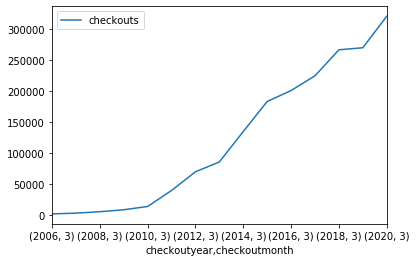

In [61]:
checkouts_per_month.plot()

In [62]:
checkouts_per_month

,,checkouts
checkoutyear,checkoutmonth,
2006,3,1236
2007,3,2484
2008,3,4766
2009,3,7983
2010,3,13268
2011,3,39150
2012,3,69467
2013,3,85342
2014,3,134621


In [63]:
sum_list = list(checkouts_per_month['checkouts'])

In [95]:
rate_list = []
for i in range(len(sum_list)-1):
    rate = sum_list[i+1]/sum_list[i] -1
    rate_list.append(rate)

In [96]:
rate_list.insert(0,np.nan)

In [97]:
checkouts_per_month['Rate of Increase'] = rate_list

In [98]:
checkouts_per_month.iloc[0:13, 1].mean()

0.630054908756185

In [99]:
checkouts_per_month.iloc[14,1]

0.18872245261868903

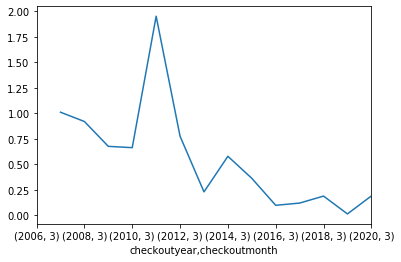

In [100]:
checkouts_per_month['Rate of Increase'].plot()

# Grouping by Checkout Type


In [117]:
checkouts_per_month_type = library_df.groupby(['checkouttype','checkoutyear', 'checkoutmonth']).sum()

In [129]:
checkouts_per_month_type = checkouts_per_month_type.reset_index()

In [131]:
OD_checkouts = checkouts_per_month_type[checkouts_per_month_type['checkouttype']=='OverDrive']

In [210]:
OD_sum_list = list(OD_checkouts['checkouts'])

OD_rate_list = []
for i in range(len(sum_list)-1):
    rate = OD_sum_list[i+1]/sum_list[i] -1
    OD_rate_list.append(rate)

In [211]:
OD_rate_list

[1.0097087378640777,
 0.9186795491143318,
 0.6749895090222409,
 0.6620318176124265,
 1.0647422369611093,
 0.46602809706257986,
 0.0266169548130768,
 0.34526962105411174,
 0.09518574368040644,
 -0.09883838301169257,
 -0.06950552183862302,
 0.01225894520602755,
 0.0124085185434879,
 0.18872245261868903]

In [212]:
OD_rate_list.insert(0,0)

In [213]:
OD_rate_list

[0,
 1.0097087378640777,
 0.9186795491143318,
 0.6749895090222409,
 0.6620318176124265,
 1.0647422369611093,
 0.46602809706257986,
 0.0266169548130768,
 0.34526962105411174,
 0.09518574368040644,
 -0.09883838301169257,
 -0.06950552183862302,
 0.01225894520602755,
 0.0124085185434879,
 0.18872245261868903]

In [214]:
OD_checkouts.set_index(np.arange(0,15,1))

,checkouttype,checkoutyear,checkoutmonth,checkouts,Rate of Increase
0,OverDrive,2006,3,1236,NaN
1,OverDrive,2007,3,2484,1.009709
2,OverDrive,2008,3,4766,0.918680
3,OverDrive,2009,3,7983,0.674990
4,OverDrive,2010,3,13268,0.662032
5,OverDrive,2011,3,27395,1.064742
6,OverDrive,2012,3,57395,0.466028
7,OverDrive,2013,3,71316,0.026617
8,OverDrive,2014,3,114808,0.345270
9,OverDrive,2015,3,147435,0.095186


In [176]:
OD_checkouts['Rate of Increase'] = OD_rate_list

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [215]:
OD_checkouts.iloc[0:13, 4].mean()

0.42559727562833943

In [216]:
OD_checkouts.iloc[0:13, 4].std()

0.4346757166211457

In [217]:
OD_checkouts.iloc[14,4]

0.18872245261868903

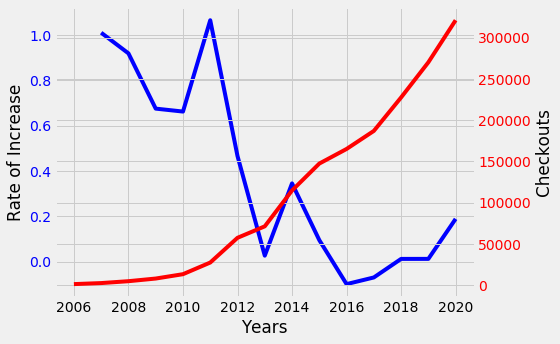

In [220]:
fig, ax1 = plt.subplots(figsize=(8,5))

color = 'blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Rate of Increase')  # we already handled the x-label with ax1
ax1.plot(OD_checkouts["checkoutyear"], OD_checkouts['Rate of Increase'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'red'

ax2.set_ylabel('Checkouts')
ax2.plot(OD_checkouts['checkoutyear'], OD_checkouts['checkouts'], color=color)
ax2.tick_params(axis='y', labelcolor=color)



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [218]:
library_df.to_csv('~/galvanize/capstone/capstone_one/library_march.csv')